<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/221101_Stock_Price_Prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2020/05/09/data-science-project-on-text-and-annotations/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [17]:
import pandas as pd
import numpy as np

import yfinance as yf
from datetime import date, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
end_date = date.today() - timedelta(1)
end_date = end_date.strftime('%Y-%m-%d')
end_date

'2022-10-31'

In [8]:
start_date = date.today() - timedelta(365*5)
start_date = start_date.strftime('%Y-%m-%d')
start_date

'2017-11-02'

In [10]:
data = yf.download('AAPL', start=start_date, end=end_date, progress=True)

[*********************100%***********************]  1 of 1 completed


In [11]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-02,41.650002,42.125000,41.320000,42.027500,39.886852,165573600
2017-11-03,43.500000,43.564999,42.779999,43.125000,40.928440,237594400
2017-11-06,43.092499,43.747501,42.930000,43.562500,41.343658,140105200
2017-11-07,43.477501,43.812500,43.400002,43.702499,41.476536,97446000
2017-11-08,43.665001,44.060001,43.582500,44.060001,41.815819,97638000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2017-11-02 to 2022-10-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1256 non-null   float64
 1   High       1256 non-null   float64
 2   Low        1256 non-null   float64
 3   Close      1256 non-null   float64
 4   Adj Close  1256 non-null   float64
 5   Volume     1256 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.7 KB


In [14]:
data.reset_index(drop=False, inplace=True)

In [18]:
data.shape

(1256, 7)

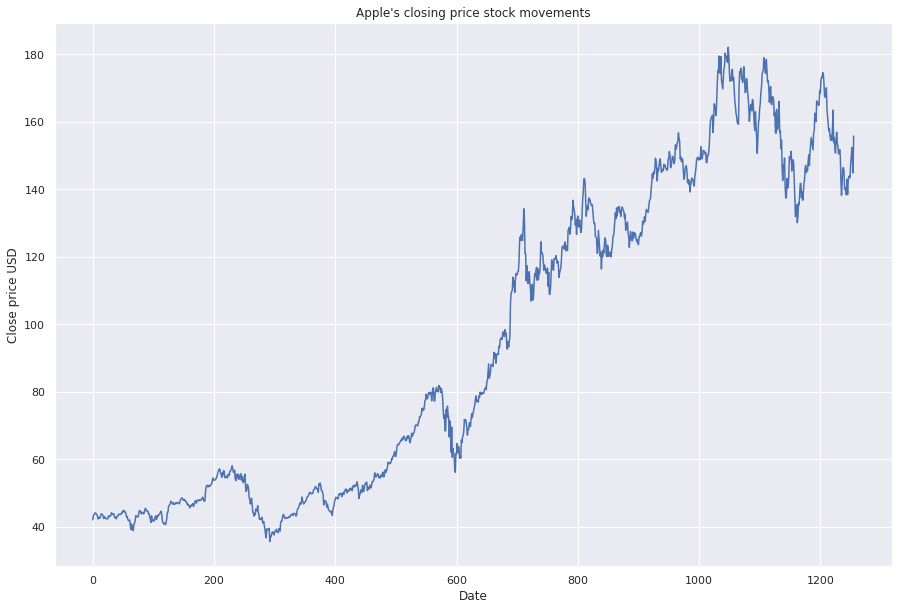

In [20]:
plt.figure(figsize=(15,10))
plt.title("Apple's closing price stock movements")
plt.ylabel("Close price USD")
plt.xlabel("Date")
plt.plot(data['Close'])
plt.show()

In [21]:
close = data[['Close']]
close

,Close
0,42.027500
1,43.125000
2,43.562500
3,43.702499
4,44.060001
...,...
1251,149.449997
1252,152.339996
1253,149.350006
1254,144.800003


In [24]:
future_days = 25

In [25]:
close['Prediction'] = close['Close'].shift(-future_days)
print(close.head())
print(close.tail())

       Close  Prediction
0  42.027500   42.342499
1  43.125000   43.167500
2  43.562500   42.924999
3  43.702499   43.067501
4  44.060001   43.055000
           Close  Prediction
1251  149.449997         NaN
1252  152.339996         NaN
1253  149.350006         NaN
1254  144.800003         NaN
1255  155.740005         NaN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
print(close.head(25))
print(close.tail(25))

        Close  Prediction
0   42.027500   42.342499
1   43.125000   43.167500
2   43.562500   42.924999
3   43.702499   43.067501
4   44.060001   43.055000
5   43.970001   43.492500
6   43.667500   44.105000
7   43.492500   43.634998
8   42.834999   43.587502
9   42.270000   43.752499
10  42.775002   43.752499
11  42.537498   42.642502
12  42.494999   42.650002
13  43.285000   42.770000
14  43.740002   42.307499
15  43.742500   43.064999
16  43.522499   43.057499
17  43.267502   43.257500
18  42.369999   43.750000
19  42.962502   43.587502
20  42.762501   43.582500
21  42.450001   43.572498
22  42.410000   43.820000
23  42.252499   44.272499
24  42.330002   44.047501
           Close  Prediction
1231  150.770004         NaN
1232  151.759995         NaN
1233  149.839996         NaN
1234  142.479996         NaN
1235  138.199997         NaN
1236  142.449997         NaN
1237  146.100006         NaN
1238  146.399994         NaN
1239  145.429993         NaN
1240  140.089996         NaN
1241 

In [27]:
x = np.array(close.drop(['Prediction'],1))[:-future_days]
print(x)

[[ 42.02750015]
 [ 43.125     ]
 [ 43.5625    ]
 ...
 [153.72000122]
 [152.74000549]
 [150.42999268]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [31]:
y = np.array(close['Prediction'])[:-future_days]
y

array([ 42.34249878,  43.16749954,  42.92499924, ..., 149.3500061 ,
       144.80000305, 155.74000549])

In [32]:
close.shape, x.shape, y.shape

((1256, 2), (1231, 1), (1231,))

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((923, 1), (308, 1), (923,), (308,))

In [35]:
tree = DecisionTreeRegressor()
tree.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [42]:
linear = LinearRegression()
linear.fit(xtrain, ytrain)

LinearRegression()

In [43]:
x_future = close.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[171.52000427],
       [167.57000732],
       [167.22999573],
       [167.52999878],
       [170.02999878],
       [163.61999512],
       [161.38000488],
       [158.91000366],
       [157.22000122],
       [157.96000671],
       [155.80999756],
       [154.52999878],
       [155.96000671],
       [154.46000671],
       [157.36999512],
       [163.42999268],
       [153.83999634],
       [155.30999756],
       [152.36999512],
       [150.69999695],
       [154.47999573],
       [156.8999939 ],
       [153.72000122],
       [152.74000549],
       [150.42999268]])

In [44]:
tree_pred = tree.predict(x_future)
print('Decision Tree Predictor: ', tree_pred)

Decision Tree Predictor:  [150.77000427 151.75999451 175.6000061  142.47999573 138.19999695
 142.44999695 146.1000061  146.3999939  145.42999268 144.40000153
 140.41999817 135.42999268 138.33999634 142.99000549 138.38000488
 142.41000366 149.3500061  143.86000061 143.38999939 147.27000427
 149.44999695 152.33999634 149.3500061  144.80000305 155.74000549]


In [45]:
linear_pred = linear.predict(x_future)
print('Linear Regression Predictor: ', linear_pred)

Linear Regression Predictor:  [171.77768821 167.91889007 167.58672877 167.87980525 170.32208445
 164.06007701 161.8718044  159.45883136 157.80784824 158.53076825
 156.4303992  155.17995344 156.57694489 155.11157737 157.95437903
 163.87446141 154.505882   155.94194336 153.06982064 151.43837993
 155.13110488 157.49522935 154.38865737 153.4312881  151.1746096 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


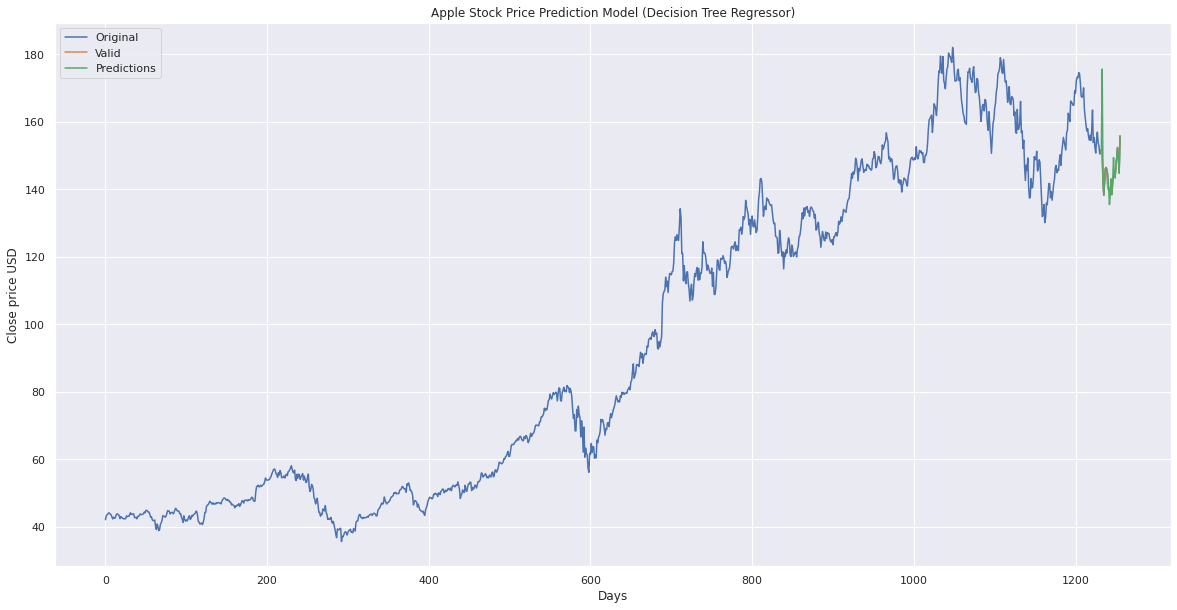

In [49]:
predictions = tree_pred
valid = data[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,10))
plt.title('Apple Stock Price Prediction Model (Decision Tree Regressor)')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(data['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Predictions'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


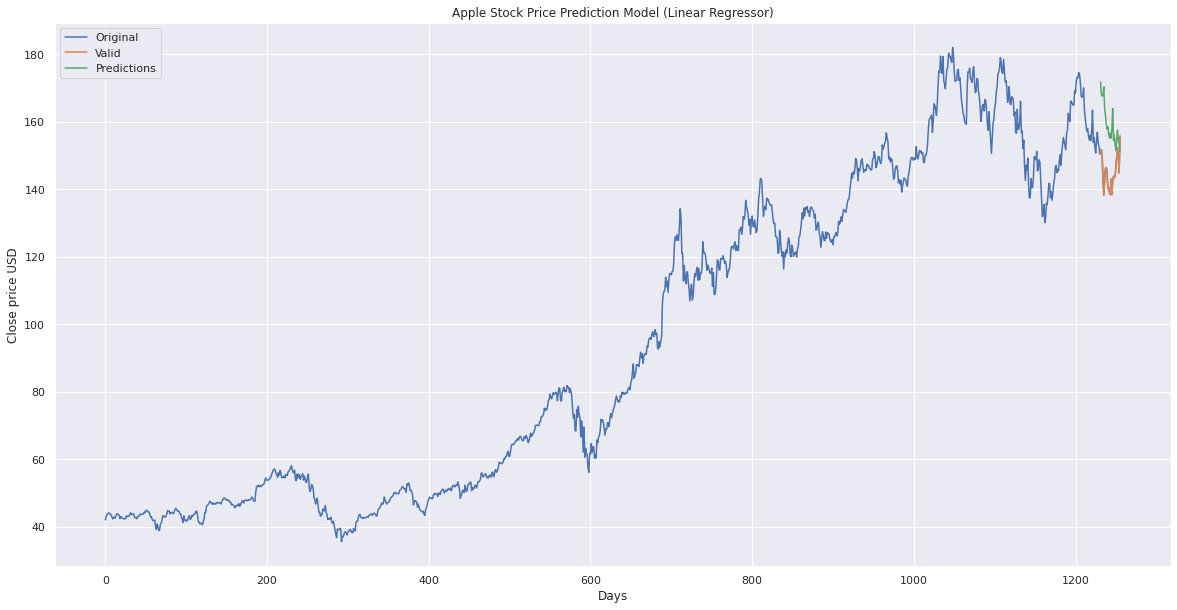

In [50]:
predictions = linear_pred
valid = data[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,10))
plt.title('Apple Stock Price Prediction Model (Linear Regressor)')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(data['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Predictions'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


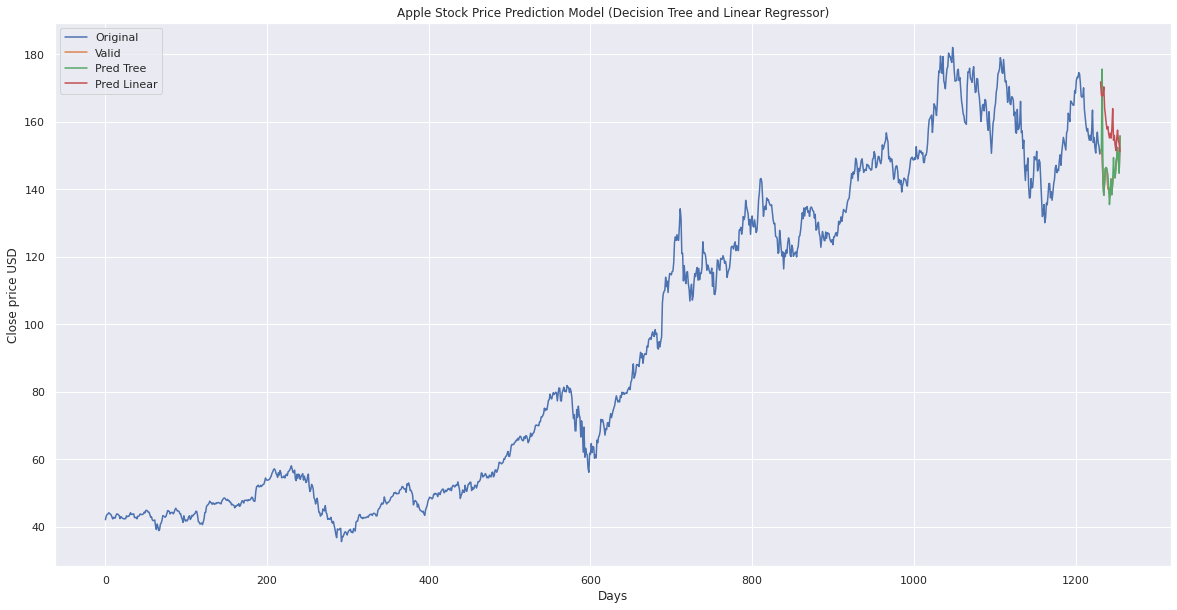

In [52]:
valid = data[x.shape[0]:]
valid['Pred Tree'] = tree_pred
valid['Pred Linear'] = linear_pred
plt.figure(figsize=(20,10))
plt.title('Apple Stock Price Prediction Model (Decision Tree and Linear Regressor)')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(data['Close'])
plt.plot(valid[['Close', 'Pred Tree', 'Pred Linear']])
plt.legend(['Original', 'Valid', 'Pred Tree', 'Pred Linear'])
plt.show()